In [26]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
gdp_df  = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gdp.csv', header = 2)
elect_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/electricity.csv', header = 2)

In [35]:
merged_df = elect_df[['Country Name', '2014']].merge(gdp_df[['Country Name', '2014']], on = 'Country Name').dropna()
merged_df = merged_df.set_index('Country Name')
merged_df.columns = ['Access to Electricity(%)', 'GDP']
merged_df = merged_df.drop(['Timor-Leste', 'Libya', 'Nauru'], axis = 0)


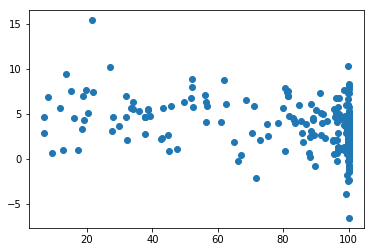

In [36]:
plt.scatter(x = merged_df['Access to Electricity(%)'], y = merged_df['GDP'])

In [34]:
merged_df.drop(['Timor-Leste', 'Libya', 'Nauru'], axis = 0)

,Access to Electricity(%),GDP
Country Name,,
Afghanistan,89.500000,2.690522
Angola,32.000000,4.703971
Albania,100.000000,1.774369
Andorra,100.000000,2.277683
Arab World,88.076774,2.453629
United Arab Emirates,100.000000,4.398697
Argentina,99.959244,-2.512615
Armenia,99.988976,3.600000
Antigua and Barbuda,96.298416,5.101940
